In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from scipy import optimize
import time
import seaborn as sns
import ML_functions as mlf
from sklearn.metrics import recall_score

#Referenced and modified Rayid's magic loop 
#Magic loop https://github.com/rayidghani/magicloops 
#Used stackoverflow for guidance on visualizations and dataframe operations

/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Read in and merge dataframes

In [2]:
full_projects_df = mlf.read_data('/Users/saptarshighose/Downloads/projects.csv', file_type = 'csv')
full_outcomes_df = mlf.read_data('/Users/saptarshighose/Downloads/outcomes.csv', file_type = 'csv')

projects_df = mlf.filter_df_by_date_range(full_projects_df, 'date_posted', '2011-01-01', '2013-12-31')
proj_out_df = pd.merge(projects_df, full_outcomes_df, on='projectid')


# Set index column

In [3]:
proj_out_df.set_index('projectid')

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
projectid,,,,,,,,,,,,,,,,,,,,,
62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,Elgin School District U-46,...,f,t,f,t,t,t,f,80.0,0.0,6.0
33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,Idaho Falls School District 91,...,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,School Administrative Unit 10,...,f,f,t,f,f,f,f,NaN,0.0,2.0
33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,Richmond City School District,...,f,f,t,f,f,f,f,NaN,0.0,1.0
e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,Ravenswood-ridge Elem Network,...,f,t,t,f,f,t,f,50.0,0.0,2.0
c685c844476d7ed75bf87699eeafd682,4b19500fb087a635c98061505f1e6c6f,34c650f9f6d5c3e42b8e2169c280ecb7,NaN,34.193630,-79.769058,Florence,SC,29501.0,urban,Florence School District 1,...,t,f,t,f,f,f,f,0.0,2.0,0.0
a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,2.102990e+11,38.249919,-85.722310,Louisville,KY,40206.0,urban,Jefferson Co School District,...,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,1.201980e+11,30.507978,-86.132003,Freeport,FL,32439.0,rural,Walton Co School District,...,f,t,t,t,t,t,f,100.0,0.0,3.0
8cdbc04c8ee2ae6afed4951727488579,697e3ea37463219c27f9652b2287c844,5ad205c4692c53cd0f5fcdfca2322a86,1.201440e+11,28.546640,-81.388606,Orlando,FL,32801.0,urban,Orange Co Public School Dist,...,t,t,t,f,f,f,f,50.0,3.0,2.0


# Imputing missing values in students reached field with mean (students_reached was only numerical field that made sense to impute with mean)

In [4]:
mlf.impute_missing_values(proj_out_df, 'students_reached', fill_method = 'mean')

# Modified functions from Rayid's Magic Loop to include baseline, more precision and recall scores and levels, and F1 scores

In [5]:

NOTEBOOK = 0

def define_clfs_params(grid_size):
    """Define defaults for different classifiers.
    Define three types of grids:
    Test: for testing your code
    Small: small grid
    Large: Larger grid that has a lot more parameter sweeps
    """

    clfs = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(),
        'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': KNeighborsClassifier(n_neighbors=3) 
            }

    large_grid = { 
    'RF':{'n_estimators': [1,10,100,1000,10000], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10], 'n_jobs': [-1]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [1,10,100,1000,10000], 'criterion' : ['gini', 'entropy'] ,'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10], 'n_jobs': [-1]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [1,10,100,1000,10000], 'learning_rate' : [0.001,0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [1,3,5,10,20,50,100]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100],'min_samples_split': [2,5,10]},
    'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100],'min_samples_split': [2,5,10]},
    'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    test_grid = { 
    'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'SGD': { 'loss': ['perceptron'], 'penalty': ['l2']},
    'ET': { 'n_estimators': [1], 'criterion' : ['gini'] ,'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
    'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
    'NB' : {},
    'DT': {'criterion': ['gini'], 'max_depth': [1],'min_samples_split': [10]},
    'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
           }
    
    if (grid_size == 'large'):
        return clfs, large_grid
    elif (grid_size == 'small'):
        return clfs, small_grid
    elif (grid_size == 'test'):
        return clfs, test_grid
    else:
        return 0, 0

# a set of helper function to do machine learning evalaution

def joint_sort_descending(l1, l2):
    # l1 and l2 have to be numpy arrays
    idx = np.argsort(l1)[::-1]
    return l1[idx], l2[idx]

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

def precision_at_k(y_true, y_scores, k):
    y_scores, y_true = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    precision = precision_score(y_true, preds_at_k)
    return precision

def recall_at_k(y_true, y_scores, k):
    #y_scores_sorted, y_true_sorted = zip(*sorted(zip(y_scores, y_true), reverse=True))
    y_scores_sorted, y_true_sorted = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores_sorted, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    recall = recall_score(y_true_sorted, preds_at_k)
    return recall

def plot_precision_recall_n(y_true, y_prob, model_name):
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax1.set_ylim([0,1])
    ax1.set_ylim([0,1])
    ax2.set_xlim([0,1])
    
    name = model_name
    plt.title(name)
    #plt.savefig(name)
    plt.show()
    


def clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test):
    """Runs the loop using models_to_run, clfs, gridm and the data
    """
    results_df =  pd.DataFrame(columns=('model_type','clf', 'parameters', 'auc-roc','baseline', 'p_at_1','p_at_2','p_at_5', 'p_at_10', 'p_at_20','p_at_30','p_at_50','recall_at_1','recall_at_2','recall_at_5','recall_at_10','recall_at_20','recall_at_30','recall_at_50','F1_at_1','F1_at_2','F1_at_5','F1_at_10','F1_at_20','F1_at_30','F1_at_50'))
    
    for n in range(1, 2):
        # create training and valdation sets
        for index,clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            for p in ParameterGrid(parameter_values):
                try:
                    clf.set_params(**p)
                    y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    # you can also store the model, feature importances, and prediction scores
                    # we're only storing the metrics for now
                    y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
                    results_df.loc[len(results_df)] = [models_to_run[index],clf, p,
                                                       roc_auc_score(y_test, y_pred_probs),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,100.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,1.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,2.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,30.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,50.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 1.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 2.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 5.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 10.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 20.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 30.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 50.0),
                                                       2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,1.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 1.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,1.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 1.0)),
                                                       2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,2.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 2.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,2.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 2.0)),
                                                      2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 5.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 5.0)),
                                                      2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 10.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 10.0)),
                                                      2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 20.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 20.0)),
                                                      2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,30.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 30.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,30.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 30.0)),
                                                      2*(precision_at_k(y_test_sorted,y_pred_probs_sorted,50.0)*recall_at_k(y_test_sorted,y_pred_probs_sorted, 50.0))/(precision_at_k(y_test_sorted,y_pred_probs_sorted,50.0) + recall_at_k(y_test_sorted,y_pred_probs_sorted, 50.0))]
                    if NOTEBOOK == 1:
                        plot_precision_recall_n(y_test,y_pred_probs,clf)
                except IndexError as e:
                    print('Error:',e)
                    continue
    return results_df

# Instatiating ML models

In [6]:

def LR():
    return LogisticRegression(penalty = 'l1', C = 1e5)

def KNN():
    return KNeighborsClassifier(n_neighbors = 3)

def DT():
    return DecisionTreeClassifier()

def SVM():
    return svm.SVC(kernel = 'linear', probability = True, random_state = 3)

def RF():
    return RandomForestClassifier(n_estimators = 50, n_jobs = -1)

def AB():
    return AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                    algorithm="SAMME",
                                                    n_estimators=200)
def GB():
    return GradientBoostingClassifier(learning_rate = 0.05,
                                    	subsample = 0.5,
                                    	max_depth = 6,
                                    	n_estimators = 10)

# Finding columns that are binary categorical columns

In [7]:
binary_categoricals = mlf.binary_categorical_vars(proj_out_df)
binary_categoricals

['school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'fulfillment_labor_materials',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'is_exciting',
 'fully_funded',
 'great_chat']

In [8]:
proj_out_df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_re

# Taking out variables that are not relevant to problem from outcomes_df variables in proj_out_df

In [9]:
relevant_df = proj_out_df[['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted','fully_funded']]

# Finding categorical variables that are non-binary

In [10]:
non_binary_categoricals = mlf.non_binary_categorical_vars(proj_out_df, binary_categoricals)
print(non_binary_categoricals)

['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'teacher_prefix', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'date_posted', 'at_least_1_teacher_referred_donor', 'at_least_1_green_donation', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor', 'great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']


# Converting t/f to 1/0

In [11]:
mlf.convert_true_false_1_0(relevant_df)

/Users/saptarshighose/Downloads/Machine-Learning/HW3/ML_functions.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x=='t' else 0)


In [12]:
relevant_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,0,0,2013-12-31,1
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,0,0,2013-12-31,0
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,0,0,2013-12-31,0
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,0,0,2013-12-31,0
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,1,0,2013-12-31,1


In [13]:
relevant_df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded'],
      dtype='object')

# Making dummies out of relevant non-binary categorical variables and adding them to original dataframe

In [14]:
relevant_df = mlf.join_and_drop_dummies(relevant_df, ['primary_focus_area', 'resource_type', 'poverty_level', 'grade_level','school_metro', 'teacher_prefix'])

In [15]:
relevant_df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'secondary_focus_subject', 'secondary_focus_area',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'Books', 'Other', 'Supplies',
       'Technology', 'Trips', 'Visitors', 'high poverty', 'highest poverty',

# Making feature set based on relevant variables (including new dummy variables)

In [16]:
features = ['school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',  'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'Books', 'Other', 'Supplies',
       'Technology', 'Trips', 'Visitors', 'high poverty', 'highest poverty',
       'low poverty', 'moderate poverty', 'Grades 3-5', 'Grades 6-8',
       'Grades 9-12', 'Grades PreK-2', 'rural', 'suburban', 'urban', 'Dr.',
       'Mr.', 'Mrs.', 'Ms.']

# Train/Test split of data based on start date of '2011-01-01'

In [17]:
x_test, x_train, y_test, y_train = mlf.temporal_train_test_data_split(relevant_df, features, 'date_posted','fully_funded', '2011-01-01')

# Run simple loop for relevant models and output to stylized table for start date of '2011-01-01'

In [18]:
# Modified based on Rayid's magic loop

def run_simple_loop(X_test, X_train, y_test, y_train):

    # define grid to use: test, small, large
    grid_size = 'test'
    clfs, grid = define_clfs_params(grid_size)
    
    # define models to run
    models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

    # call clf_loop and store results in results_df
    results_df = clf_loop(models_to_run, clfs,grid, X_test, X_train, y_test, y_train)

    return results_df

In [19]:
df2 = run_simple_loop(x_test, x_train, y_test, y_train)

/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RF
DT
KNN
ET
AB
GB
LR
NB


In [20]:
cm = sns.light_palette("lightblue", as_cmap=True)

df2.style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm)

,model_type,clf,parameters,auc-roc,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,recall_at_1,recall_at_2,recall_at_5,recall_at_10,recall_at_20,recall_at_30,recall_at_50,F1_at_1,F1_at_2,F1_at_5,F1_at_10,F1_at_20,F1_at_30,F1_at_50
0,RF,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=1, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1, oob_score=False, random_state=None, verbose=0, warm_start=False)","{'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1}",0.545747,0.689862,0.998084,0.999043,0.999617,0.999809,0.815502,0.876938,0.926124,0.0144538,0.028963,0.0724352,0.144926,0.23642,0.381346,0.671226,0.0284949,0.056294,0.135082,0.253156,0.366569,0.531544,0.778337
1,DT,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')","{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10}",0.589178,0.689862,1,1,1,0.887656,0.640478,0.760319,0.856191,0.0144815,0.0289907,0.072463,0.128669,0.185679,0.330633,0.62054,0.0285496,0.0563479,0.135134,0.224758,0.287896,0.460857,0.719564
2,KNN,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')","{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}",0.568479,0.689862,1,1,0.911179,0.582775,0.791388,0.684976,0.743426,0.0144815,0.0289907,0.0660267,0.0844754,0.229429,0.297869,0.538812,0.0285496,0.0563479,0.123131,0.147561,0.35573,0.415189,0.624793
3,ET,"ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini', max_depth=1, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1, oob_score=False, random_state=None, verbose=0, warm_start=False)","{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1}",0.524294,0.689862,0.998084,0.999043,0.999617,0.999809,0.659617,0.658501,0.795062,0.0144538,0.028963,0.0724352,0.144926,0.191228,0.286356,0.576236,0.0284949,0.056294,0.135082,0.253156,0.296499,0.399142,0.668189
4,AB,"AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best'), learning_rate=1.0, n_estimators=1, random_state=None)","{'algorithm': 'SAMME', 'n_estimators': 1}",0.589178,0.689862,1,1,1,0.887656,0.640478,0.760319,0.856191,0.0144815,0.0289907,0.072463,0.128669,0.185679,0.330633,0.62054,0.0285496,0.0563479,0.135134,0.224758,0.287896,0.460857,0.719564
5,GB,"GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=1, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1, presort='auto', random_state=None, subsample=0.5, verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1, 'subsample': 0.5}",0.589158,0.689862,1,1,1,0.888038,0.640287,0.760191,0.856115,0.0144815,0.0289907,0.072463,0.128724,0.185624,0.330578,0.620485,0.0285496,0.0563479,0.135134,0.224855,0.28781,0.46078,0.719499
6,LR,"LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1', random_state=None, solver='libli

# Plot some precision-recall curves

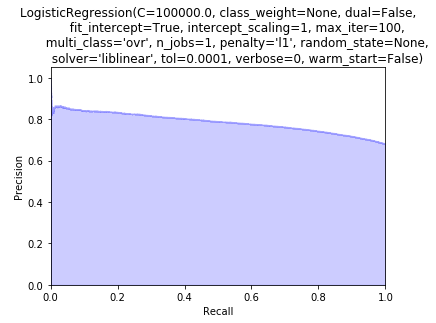

In [ ]:
mlf.plot_precision_recall_curve(LR(),x_test, x_train, y_test, y_train)

In [ ]:
mlf.plot_precision_recall_curve(AB(),x_test, x_train, y_test, y_train)

In [ ]:
mlf.plot_precision_recall_curve(GB(),x_test, x_train, y_test, y_train)

# Train/Test split of data based on start date of '2011-07-01'

In [ ]:
x_test, x_train, y_test, y_train = mlf.temporal_train_test_data_split(relevant_df, features, 'date_posted','fully_funded', '2011-07-01')

# Run simple loop for relevant models and output to stylized table for start date of '2011-07-01'

In [ ]:
df3 = run_simple_loop(x_test, x_train, y_test, y_train)
cm = sns.light_palette("lightgreen", as_cmap=True)

df3.style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm)

# Train/Test split of data based on start date of '2012-01-01'

In [ ]:
x_test, x_train, y_test, y_train = mlf.temporal_train_test_data_split(relevant_df, features, 'date_posted','fully_funded', '2012-01-01')
df4 = run_simple_loop(x_test, x_train, y_test, y_train)


# Run simple loop for relevant models and output to stylized table for start date of '2012-01-01'

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)

df4.style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm)